# Algoritmo Metropolis Hastings

Es un algoritmo para producir muestras a partir de distribuciones que de otro modo podrían ser difíciles de muestrear. Supongamos que queremos muestrear a partir de una distribución π, que llamaremos distribución "objetivo". El algoritmo MH funciona simulando una cadena de Markov, cuya distribución estacionaria es π. Esto significa que, a la larga, las muestras de la cadena de Markov se parecen a las muestras de π. Como veremos, el algoritmo es increíblemente simple y flexible. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Ejercicio 1:

Solución variacional para el átomo de Hidrógeno (en unidades atómicas) con:

$$ \Psi(r) \approx e^{-\alpha r / a_0}$$
  
$$ \hat{H} = - \frac{1}{2 \mu} \left( \frac{d^2}{dr^2} + \frac{2}{r} \frac{d}{dr} \right)+ \frac{l(l+l)}{2 \mu^2} - \frac{Z}{r} $$

Con:
+ $\alpha$, el parámetro variacional
+ $a_0=\frac{4 \pi \epsilon_0 \hbar^2}{m_e^2}$, el radio de Bohr.
+ $Z=1$
+ $l=0$, el número cuántico angular. 
+ $\hbar=1$
+ $m_e=1$
+ $4 \pi \epsilon_0 = 1 $

In [2]:
#------------ METROPOLIS ------------------------------
# particula en R3, coordenadas cilindricas.

def phi(r, alpha):
    return np.exp(-alpha*r)

def p(r, alpha):
    return phi(r,alpha)*phi(r,alpha)

# Markov Chain Monte Carlo
def MCMC(N, alpha,step=0.01):
    r = []
    r1=np.array([0.,0.,0.])
    for i in range(N):
        r2 = np.random.random([3])
        r2 = r1+step*r2/np.linalg.norm(r2)
        P = p(np.linalg.norm(r2), alpha)/p(np.linalg.norm(r1), alpha) 
        if P >= 1.:
            r.append(np.linalg.norm(r2))
            r1=r2.copy()
        else:
            R = np.random.uniform(0,1)
            if P >= R:
                r.append(np.linalg.norm(r2))
                r1=r2.copy()
    return np.array(r)

# Implementando metodo variacional con integral montecarlo.
def Et(alpha, n_samples=5000, ls=5.):
    
    # Integral R*R
    r=MCMC(n_samples, alpha)
    f= r**2 * np.exp(-2*alpha*r)
    fmed=np.sum(f)/len(r)
    int1 = fmed*(ls-0.0)
    
    # Integral RHR
    R = np.exp(-alpha*r)
    d1R = -alpha*np.exp(-alpha*r)
    d2R = alpha**2 * np.exp(-alpha*r)
    RHR = r**2 * R * (-1/(2*mu)*(d2R + 2/r*d1R) + l*(l+l)/(2*mu**2)*R - Z/r*R)
    fmed=np.sum(RHR)/len(r)
    int2 = fmed*(ls-0.0)
    
    return int2/int1

alpha=1.000 da la mínima energía: -0.500


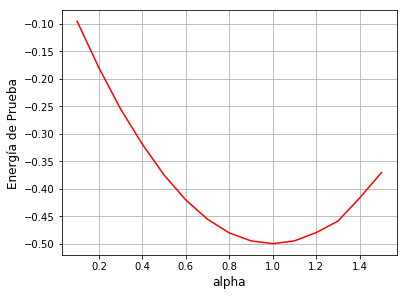

In [3]:
mu = 1.0  # Masa reducida
l = 0.0 # Numero cuantico angular
Z = 1.0 # Masa atómica
n_samples = 10000

alphas = np.linspace(0.1,1.5,15)
Ets = [Et(alpha) for alpha in alphas]

pos = Ets.index(min(Ets))
print("alpha=%.3f da la mínima energía: %.3f"%(alphas[pos], Ets[pos]))

plt.figure(figsize=(6,4.5))
plt.plot(alphas,Ets, 'r')
plt.xlabel('alpha', fontsize=12)
plt.ylabel('Energía de Prueba', fontsize=12)
plt.grid()
plt.show()

## Ejercicio 2

Consider one particle in one-dimensional Morse potential,

$$ V(x) = D_e \left(1-e^{-\beta(x-x_0)} \right)^2$$

For concreteness, consider $D_e = 2 E_h$, $\beta = 1/2 a_0 ^{-1}$, and $m=1 m_e$. Plot the potential and sketch your guess for the wavefunction.  
(a) Using a trial function of the form $\Psi(x)=\exp(-\alpha x^2)$, determine the optimal value of $\alpha$ and find the ground state energyand wavefunction using the Metropolis VMC method.

**Solución**:

+ Se tiene que:

$$ \hat{H} = -\frac{\hbar^2}{2 m} \nabla^2 + V(x) $$

+ Por lo tanto:

$$ \hat{H} = - \frac{1}{2 m} \left( \frac{d^2}{dx^2} \right) + D_e \left(1-e^{-\beta(x-x_0)} \right)^2 $$

In [4]:
# ------------ METROPOLIS ------------------------------
# particula en coordenadas cartesianas.

def phi(x, alpha):
    return np.exp(-alpha*x**2)

def V(x):
    return De*(1-np.exp(-beta*(x-x0)))**2

def p(x, alpha):
    return phi(x,alpha)*phi(x,alpha)

def MCMC(alpha, N=5000, ls=5.):
    x = []
    x1 = np.random.random()
    for i in range(N):
        x2 = np.random.uniform(-ls, ls)
        P = p(x2, alpha)/p(x1, alpha) # Acceptance ratio
        if P >= 1.:
            x.append(x2)
            x1=x2
        else:
            R = np.random.uniform(0, 1)
            if P >= R:
                x.append(x2)
                x1=x2
    return np.array(x)

# Implementando montecarlo.
def Et(alpha, n_samples=10000, ls=5.):
    
    # Integral R*R
    x=MCMC(alpha, n_samples, ls)
    f= np.exp(-2*alpha*x**2)
    fmed=np.sum(f)/len(x)
    int1 = fmed*(ls-0.)

    # Integral RHR
    R = np.exp(-alpha*x**2)
    d2R = (4 * alpha**2 * x**2 - 2*alpha)*np.exp(-alpha*x**2)
    RHR = R * (-1/(2*m)*d2R + V(x)*R)
    fmed=np.sum(RHR)/len(x)
    int2 = fmed*(ls-0.)
    
    return int2/int1

alpha=0.400 da la mínima energía: 0.505


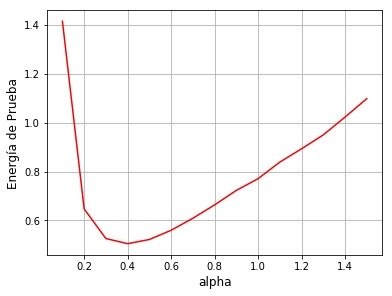

In [5]:
#DEFINIENDO PARAMETROS
De = 2 # Eh
beta = 0.5 # a0^(-1)
m = 1.0  # Masa reducida
x0 = 0.

alphas = np.linspace(0.1,1.5,15)
Ets = [Et(alpha) for alpha in alphas]

pos = Ets.index(min(Ets))
print("alpha=%.3f da la mínima energía: %.3f"%(alphas[pos], Ets[pos]))

plt.figure(figsize=(6,4.5))
plt.plot(alphas,Ets, 'r')
plt.xlabel('alpha', fontsize=12)
plt.ylabel('Energía de Prueba', fontsize=12)
plt.grid()
plt.show()

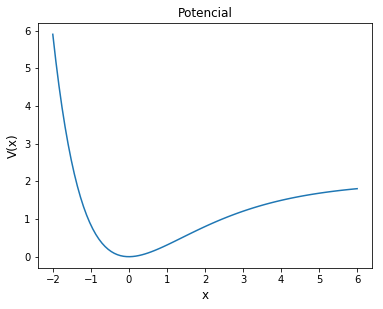

In [6]:
# GRAFICA DEL POTENCIAL
plt.figure(figsize=(6,4.5))
x = np.linspace(-2,6,100)
y =  V(x)
plt.plot(x,y)
plt.xlabel('x', fontsize=12)
plt.ylabel('V(x)', fontsize=12)
plt.title('Potencial')
plt.show()